# Casusopdracht 


## Inhoudopgave



## Inleiding

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import mode
from scipy.stats import iqr


## 1. Data understanding & preparation

In [3]:
db = pd.read_csv("movie.csv")

laten we eerst kijken hoe de database er uit ziet.

In [4]:
db.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
# TODO: even kijken naar duplicates


In [6]:
db.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

### 1.1 Duplicates

Bijna alle datasets hebben fouten in de data zitten. Een van deze fouten is een duplicates in de dataset.

In [7]:
db.duplicated().sum()

45

Zo te zien zijn er in deze dataset 45 duplicates.

In [8]:
duplicates = db[db.duplicated()]
duplicates.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0


In [9]:
db[db['movie_title'] == duplicates.iloc[1]['movie_title']]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
174,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000


Hierboven kunnen we een voorbeeld van een duplicate zien in onze data. De duplicates worden verwijderd omdat deze de data slecht beïnvloeden.

In [10]:
db.drop_duplicates(inplace=True)

### 1.2 Target variabele

De eerste onderzoeksvraag bedraagt:<br> In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?<br>

Hieruit kunnen we opmaken dat `gross` de target variabele is.

### 1.3 Feature variabele

De eerste onderzoeksvraag bedraagt:<br> In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB?<br>

Zoals we hierboven bij targetvariable zien willen we de omzet voorspellen op bassis van de populariteit op Facebook en IMDB.

voor waar het de kolommen integers of floats zijn kunnen we kijken wat de correlatie is tussen deze kolom en de "gross" kolom

In [11]:
db.select_dtypes(include=['int', 'float']).dropna().corr()["gross"]


num_critic_for_reviews       0.465240
duration                     0.241658
director_facebook_likes      0.141333
actor_3_facebook_likes       0.283060
actor_1_facebook_likes       0.145646
gross                        1.000000
num_voted_users              0.624751
cast_total_facebook_likes    0.231111
facenumber_in_poster        -0.034593
num_user_for_reviews         0.548107
budget                       0.099220
title_year                   0.050710
actor_2_facebook_likes       0.245845
imdb_score                   0.212850
aspect_ratio                 0.067210
movie_facebook_likes         0.360231
Name: gross, dtype: float64

Hieruit hebben we de volgende kolommen gekozen om de populariteit op Facebook en IMDB te representeren:
- `imdb_score`
- `num_critic_for_reviews`
-  `num_voted_users`
- `num_user_for_reviews`
- `movie_facebook_likes`

In [12]:
# hier maken we een subset met de target en de gekozen features
interesting = db[["gross", "imdb_score", "num_critic_for_reviews", "num_voted_users", "num_user_for_reviews", "movie_facebook_likes"]]

### 1.4 Missende waardes

In [13]:

interesting.isna().sum()

gross                     874
imdb_score                  0
num_critic_for_reviews     49
num_voted_users             0
num_user_for_reviews       21
movie_facebook_likes        0
dtype: int64

De features die NaN waardes bevatten zijn niet in te vullen met standaard waardes dus we halen deze rijen uit de data.

`gross` is de targetvariabele. Als deze NaN values bevat kunnen deze niet gebruikt worden voor een model. Dus deze rijen kunnen we verwijderen uit de dataset.

In [14]:
nonna = interesting.dropna(subset=["gross"])

In [15]:
nonna.isna().sum()


gross                     0
imdb_score                0
num_critic_for_reviews    3
num_voted_users           0
num_user_for_reviews      1
movie_facebook_likes      0
dtype: int64

We zien hier na het droppen van de lege waardes van `gross` dat er nog vier legen waardes overblijven.

In [16]:
nonna[nonna['num_critic_for_reviews'].isna()]

,gross,imdb_score,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
4588,227241.0,7.4,NaN,56,2.0,32
4711,23616.0,5.6,NaN,94,4.0,11
4713,79043.0,6.3,NaN,85,NaN,358


We zien hier drie rijen die de overige lege waardes bevatten. Deze zijn niet correct aan te vullen. Dus om de dataset zo accuraat mogelijk te houden en omdat het om zo weinig rijen gaat, besluiten we deze te verwijderen.

In [17]:
nonna = nonna.dropna()
nonna.isna().sum()

gross                     0
imdb_score                0
num_critic_for_reviews    0
num_voted_users           0
num_user_for_reviews      0
movie_facebook_likes      0
dtype: int64

In [18]:
print(interesting.shape)
nonna.shape

(4998, 6)


(4121, 6)

We zien dat er nog 4121 rijen over zijn die geen lege waardes bevatten. Er zijn 877 rijen weg zijn gehaald. Dit bedraagt 17,5% van de originele dataset.

### 1.5 Centrum- en spreidingsmaten en outliers

In dit hoofdstuk gaan we kijken naar alle centrummaten, spreidingsmaten en outlier om de dataset beter te kunnen begrijpen.

#### 1.5.1 centrum- en spreidingsmaten


We gaan kijken naar de centrummaten:
- `Gemiddelde`
- `Modus`
- `Mediaan`

en de spreidingsmaten:
- `Standaarddeviatie`
- `Max` en `min`
- `Interkwartielafstand`

Om deze te kunnen berekenen en tonen gebruiken wij de describe functie. Deze heeft alleen niet de modus dus deze wordt er apart ingezet.

In [19]:

modedf = pd.DataFrame({column: mode(nonna[column]) for column in nonna.columns}, index=["mode"])
IQRdf = pd.DataFrame({column: iqr(nonna[column]) for column in nonna.columns}, index=["IQR"])


In [20]:
modedf

,gross,imdb_score,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
mode,218051260.0,6.7,81.0,3665,26.0,0


In [21]:

censp = nonna.describe(include='all')
# Concatenate the new row
df = pd.concat([censp, modedf, IQRdf], ignore_index=False)
df

,gross,imdb_score,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
count,4.121000e+03,4121.000000,4121.000000,4.121000e+03,4121.000000,4121.000000
mean,4.836075e+07,6.470444,158.996603,9.729013e+04,312.068673,8682.480223
std,6.797711e+07,1.050162,122.468571,1.468185e+05,399.261300,20757.890318
min,1.620000e+02,1.600000,1.000000,5.000000e+00,1.000000,0.000000
25%,5.308707e+06,5.900000,70.000000,1.508800e+04,93.000000,0.000000
50%,2.546448e+07,6.600000,129.000000,4.639600e+04,190.000000,178.000000
75%,6.232104e+07,7.200000,216.000000,1.144070e+05,374.000000,10000.000000
max,7.605058e+08,9.300000,813.000000,1.689764e+06,5060.000000,349000.000000
mode,2.180513e+08,6.700000,81.000000,3.665000e+03,26.000000,0.000000
IQR,5.701233e+07,1.300000,146.000000,9.931900e+04,281.000000,10000.000000


Kijkend naar de dataframe hierboven worden alle centrummaten en spreidingsmaten weergegeven.

de centrummaten:
- `Gemiddelde` = `mean`
- `Modus` = `mode`
- `Mediaan` = `50%`

de spreidingsmaten:
- `Standaarddeviatie` = `std`
- `Max` en `min` = `max` en `min`
- `Interkwartielafstand` = `IQR` of `75% - 25 %`


#### 1.5.2 Outliers

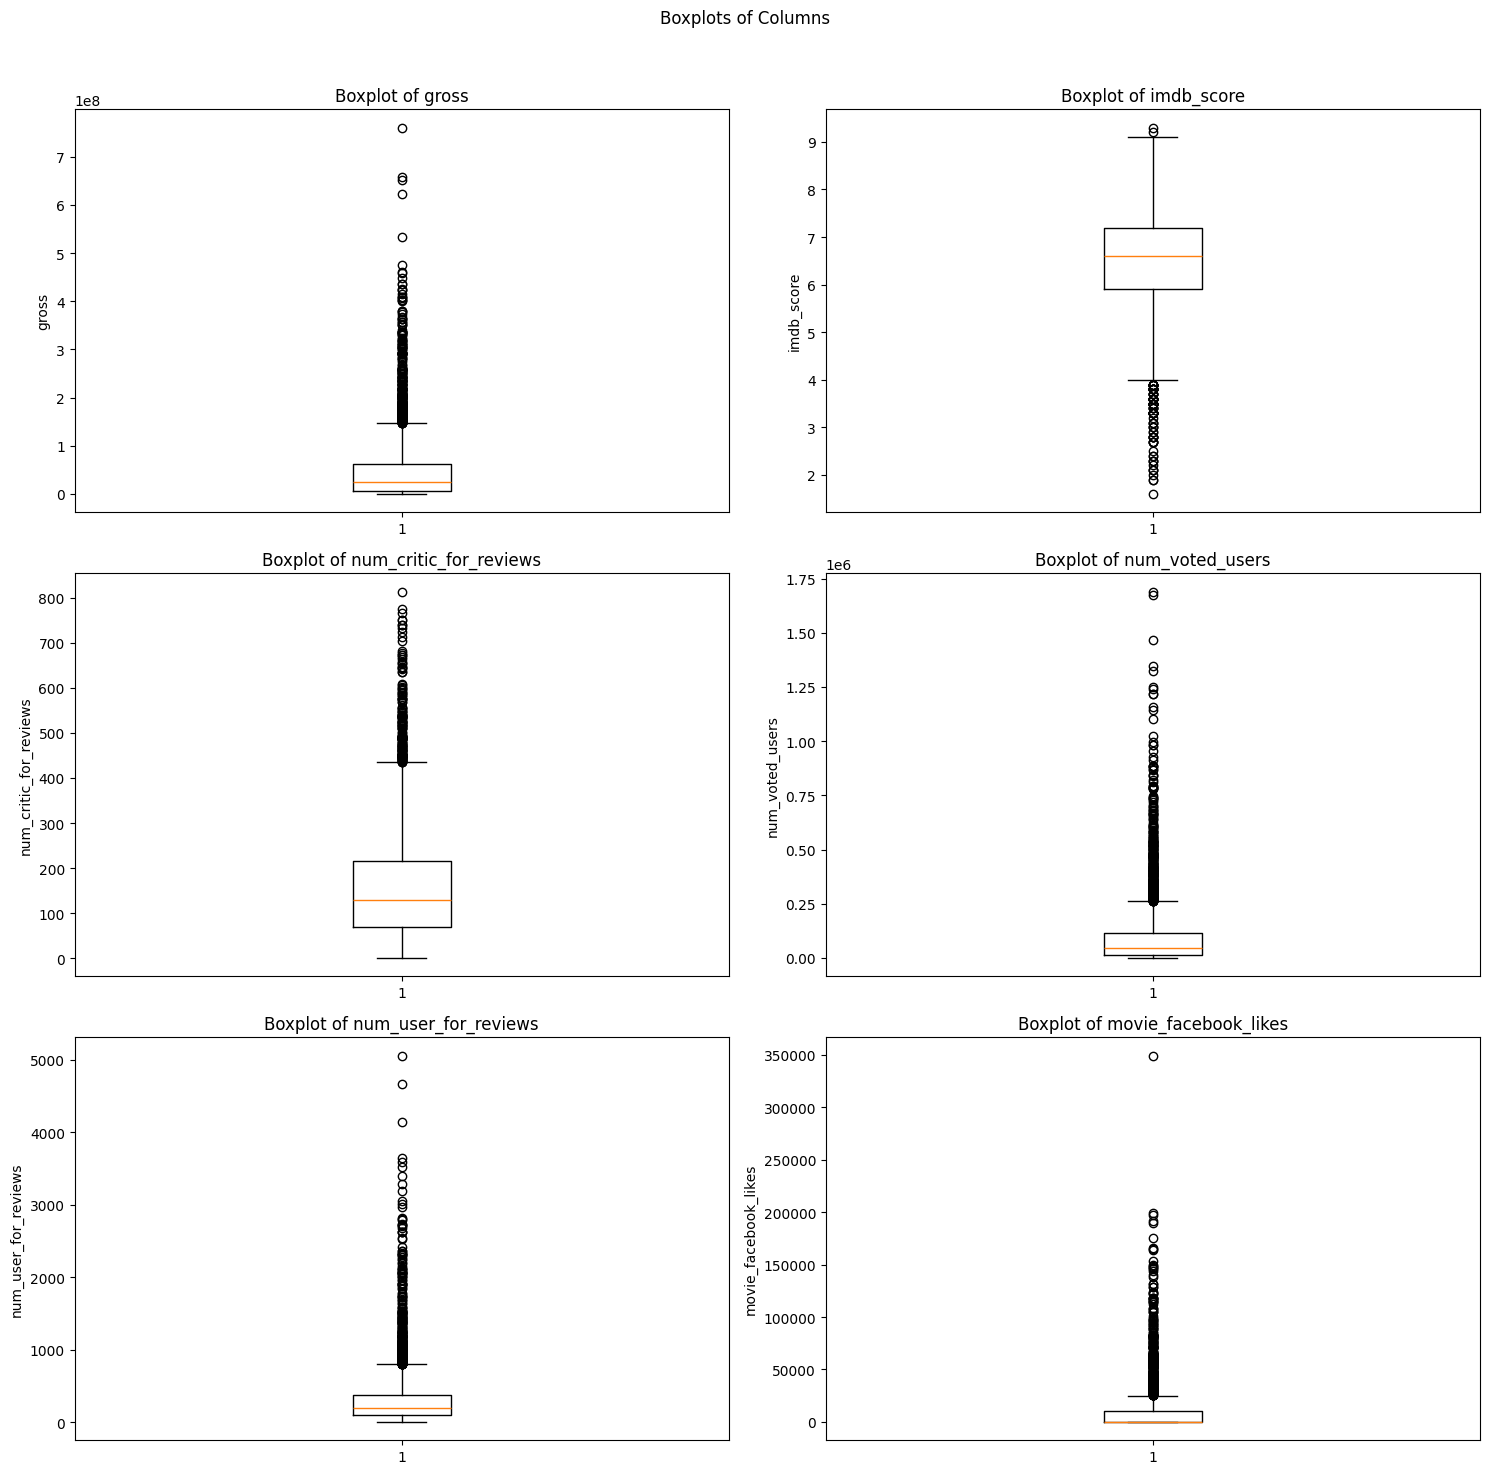

In [22]:
n_cols = 2
n_rows = math.ceil(len(nonna.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Boxplots of Columns')


axes = axes.flatten()

# Plot boxplots for each column in nonna
for i, column in enumerate(nonna.columns):
    axes[i].boxplot(nonna[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In de boxplots hierboven zien we een hoop uitschieters. Wij hebben besloten deze in de data te houden omdat het geen onlogische waardes zijn zoals min getallen of rare uitschieters.

### 1.6 Distributie

Om verdere begrip over de data te kunnen vergroten kunnen we kijken naar hoe de data verdeelt is. Hiervoor kunnen we naar de distributie kijken.

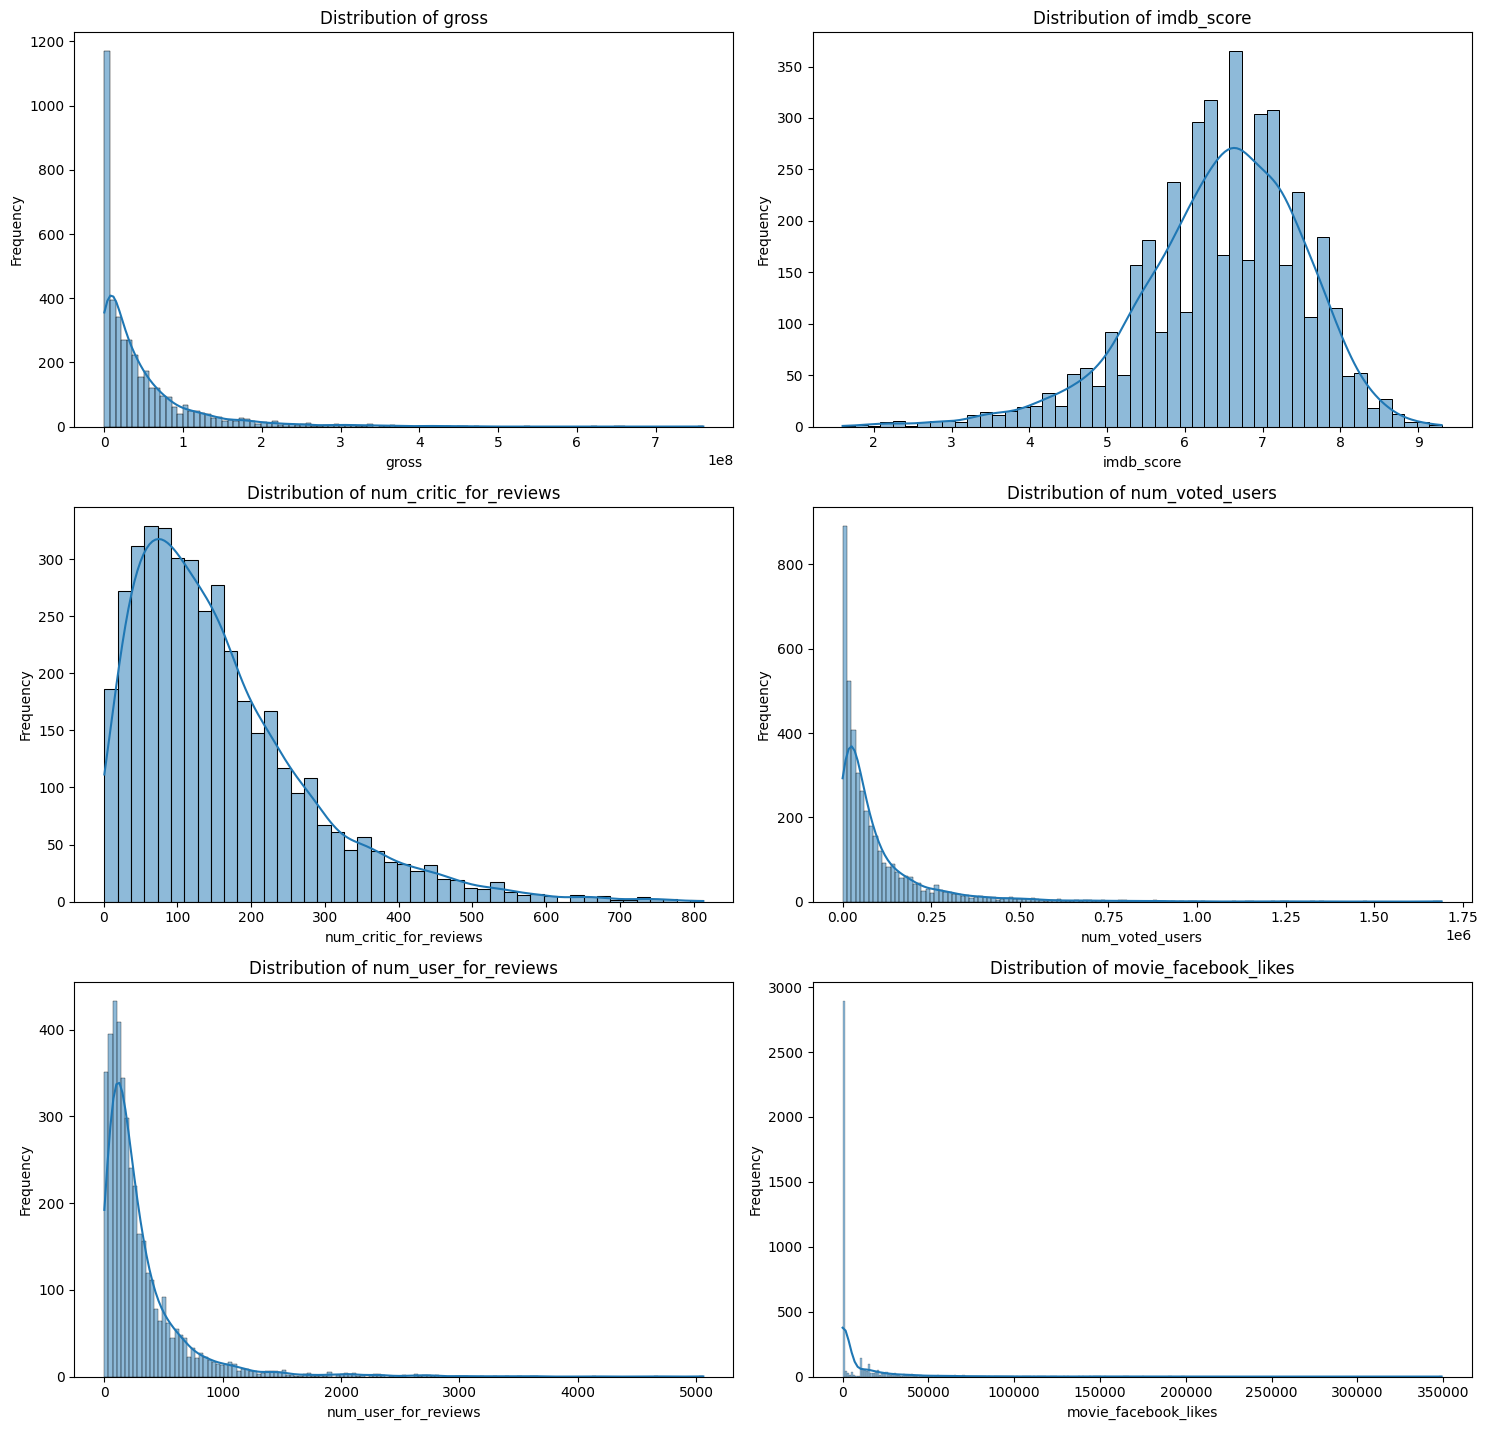

In [23]:

n_cols = 2
n_rows = math.ceil(len(nonna.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(nonna.columns):
    sns.histplot(data=nonna[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In de plots hierboven zien we de distributie van de data. Hieruit kunnen bijvoorbeeld de destributie van gross hier te vergelijken met de distributie van ons model om te zien of dit overeen komt en dus de werkelijkheid goed representeerd.

### 1.7 Extra opmerkingen over de data

In [24]:
print(db.sort_values("budget", ascending=False)[["movie_title", "language", "actor_1_name", "budget", "gross"]])

                     movie_title   language         actor_1_name  \
2988                   The Host      Korean            Doona Bae   
3859             Lady Vengeance      Korean         Min-sik Choi   
3005                   Fateless   Hungarian         Marcell Nagy   
2323          Princess Mononoke    Japanese        Minnie Driver   
2334                   Steamboy    Japanese     William Hootkins   
...                          ...        ...                  ...   
5030             On the Downlow     English  Tatiana Suarez-Pico   
5032                       Bang     English         Peter Greene   
5038    Signed Sealed Delivered     English          Eric Mabius   
5039  The Following                 English          Natalie Zea   
5041           Shanghai Calling     English            Alan Ruck   

            budget      gross  
2988  1.221550e+10  2201412.0  
3859  4.200000e+09   211667.0  
3005  2.500000e+09   195888.0  
2323  2.400000e+09  2298191.0  
2334  2.127520e+09   41

De dataset bevat een kolom 'gross' die de omzet van films weergeeft. We hebben deze data vergeleken met de data die op Imdb staat. Hieruit hebben we kunnen opmaken dat de kolom 'gross' gebaseerd is op de omzet in Noord-Amerika. Dit is een belangrijk gegeven om te weten omdat de omzet in Noord-Amerika niet gelijk is aan de omzet in de rest van de wereld. Dit kan invloed hebben op de voorspelling van de omzet van een film.

`TODO`: uitleg hoe de budget niet altijd in amerikaanse dollars is maar de omzet wel.

In [25]:
db[db["country"] == "Canada"][["budget", "gross", "movie_title"]]

,budget,gross,movie_title
34,210000000.0,234360014.0,X-Men: The Last Stand
210,110000000.0,214948780.0,X-Men 2
506,80000000.0,23219748.0,Pompeii
690,43000000.0,24407944.0,Elektra
834,56000000.0,113006880.0,The Pacifier
...,...,...,...
4965,100000.0,NaN,Indie Game: The Movie
4985,NaN,NaN,The Dirties
5011,25000.0,2856622.0,In the Company of Men
5014,NaN,NaN,Rampage


### 1.8 Data transfer

In [26]:
nonna.to_csv("vraag_1_movies.csv", index=False)